<center><img alt="" src="images/tau-data_banner.png"/></center>
<center><strong><h1>HPDS-01: Pendahuluan High Performance Data Science via Python - JIT</h1></strong><br />
<img alt="" src="images/PDS_logo.jpg" />

## (C)Taufik Sutanto
## https://tau-data.id/hpds-01/


# “Simplicity is the soul of efficiency.” – Austin Freeman

<img alt="" src="images/meme_compiler.jpg" />

# Python sering dituding "Lambat"

<img alt="" src="images/1_Python_VS_TheRest.png" />

# Numba: Just-In-Time (JIT) Compiler

<img alt="" src="images/numba_logo.png" />

* Cara terbaik untuk mengoptimalkan code adalah menggunakan profiling untuk menemukan "Bottleneck" process, lalu optimize fungsi tersebut.
* Numba adalah module yang merupakan "Decorator Fungsi" (akan dijelaskan)
* Numba Secara realtime (JIT) meng-compile fungsi tersebut.

# Code Profiling

<img alt="" src="images/code_bottleneck.png" />

* Image source: https://scoutapm.com/blog/identifying-bottlenecks-and-optimizing-performance-in-a-python-codebase

# Profiling sederhana

In [16]:
import numpy as np
from time import time
from functools import reduce

N = 10**7
X = np.random.rand(N)

def fs1(X):
    s = 0
    for x in X:
        s += x
    return s/len(X)

def fs2(X):
    return sum(X)/len(X)

def fs3(X):
    return reduce(lambda a,c: a+c, X, 0)/len(X)

def fs4(X):
    return np.mean(X)

In [18]:
mulai = time()
rerata = fs1(X)
akhir = time()
print("Fungsi pertama hasil = {}, waktu yang dibutuhkan = {}".format(rerata, akhir-mulai))

Fungsi pertama hasil = 0.49990601777899496, waktu yang dibutuhkan = 1.9884543418884277


In [19]:
mulai = time()
rerata = fs2(X)
akhir = time()
print("Fungsi kedua hasil = {}, waktu yang dibutuhkan = {}".format(rerata, akhir-mulai))

Fungsi kedua hasil = 0.49990601777899496, waktu yang dibutuhkan = 1.7475872039794922


In [17]:
mulai = time()
rerata = fs3(X)
akhir = time()
print("Fungsi ketiga hasil = {}, waktu yang dibutuhkan = {}".format(rerata, akhir-mulai))

Fungsi ketiga hasil = 0.49990601777899496, waktu yang dibutuhkan = 2.7796430587768555


In [20]:
mulai = time()
rerata = fs4(X)
akhir = time()
print("Fungsi ke-4 hasil = {}, waktu yang dibutuhkan = {}".format(rerata, akhir-mulai))

Fungsi ke-4 hasil = 0.4999060177790899, waktu yang dibutuhkan = 0.015958309173583984


# Cross Validasi Hasil

In [24]:
%timeit fs4(X)

14.1 ms ± 388 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%%timeit

fs4(X)

13.9 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Fungsi Decorator di Python

In [30]:
def bersyukur():
    print('Alhamdulillah')

In [31]:
bersyukur()

Alhamdulillah


In [27]:
def yakinkan(func):
    def wrapper():
        while True:
            res = input('Yakin anda ingin bersyukur? [y/n]')
            if res.lower().strip()=='n':
                return
            elif res.lower().strip()=='y':
                func()
                return
    return wrapper 

In [29]:
fs = yakinkan(bersyukur)
fs()

Yakin anda ingin bersyukur? [y/n]y
Alhamdulillah


# Tapi bisa dibuat lebih mudah lewat "Decorator" fungsi "@"

In [32]:
@yakinkan
def bersyukur():
    print('Alhamdulillah')

In [33]:
bersyukur()

Yakin anda ingin bersyukur? [y/n]y
Alhamdulillah


# Numba sebagai JIT Function Decorator

In [34]:
from numba import njit

jit_fs1 = njit(fs1)

In [35]:
%timeit fs1(X)

2.26 s ± 473 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%timeit jit_fs1

42.2 ns ± 0.566 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Cara kerja Numba

<img alt="" src="images/cara_kerja_numba.png"/>

* https://towardsdatascience.com/numba-weapon-of-mass-optimization-43cdeb76c7da
* IR Intermediate Representations
* Bytecode Analysis Intermediate code more abstract than machine code
* LLVM Low Level Virtual Machine, infrastructure to develop compilers
* NVVM It is an IR compiler based on LLVM, it is designed to represent GPU kernels

# Studi Kasus: Approksimasi nilai $\Pi$ Dengan Hit-or-Miss Monte Carlo

<img alt="" src="images/hit-miss_monteCarlo.gif"/>

* Misal terdapat sebuah bujur sangkar dengan panjang sisinya 1. Di dalam bujur sangkar tersebut terdapat ¼ lingkaran dengan jari-jari 1, sehingga luasnya adalah $\Pi/4$. Dengan demikian sebuah titik (x,y) didalam bujur sangkar tetapi diluar lingkaran akan memenuhi pertidaksamaan $x^2+y^2>1$
* Dengan Monte carlo kita akan coba aproksimasi nilai $\Pi$ dengan sistem di atas.
* Kita akan men-generate N bilangan Random uniform [0,1] = (x,y) dan memeriksa apakah titik tersebut berada di dalam lingkaran. Ratio Jumlah titik di dalam lingkaran dan total titik yang digunakan akan mendekati ratio luas lingkaran dan bujur sangkar. Sehingga nilai $\Pi$ dapat didekati dengan sederhana lewat formula:
* 4*(jumlah titik dlm Ligkaran)/(Total titik.)

In [45]:
def hmMC(N):
    NInside = 0.0
    X = np.random.rand(N)
    Y = np.random.rand(N)
    for x,y in zip(X,Y):
        r = x**2 + y**2
        if (r <= 1):
            NInside += 1      
    return 4.0*NInside/N

In [42]:
# Testing
for i in range(8):
    print(hmMC(10**i), end=',  ')

0.0,  3.6,  3.0,  3.144,  3.1272,  3.14892,  3.143032,  3.142648,  

In [48]:
%timeit hmMC(10**7)
# Tanpa JIT - HATI-HATI ini SANGAT LAMA .... 

20.9 s ± 1.6 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
jit_hmMC = njit(hmMC)

In [50]:
%timeit jit_hmMC(10**7)
# Dengan JIT

313 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Contoh 2: Fungsi (Fractal) Mandelbrot $Z_{n+1}=Z_n + C$

<img alt="" src="images/Mandelbrot_sequence_new.gif"/>

* https://en.wikipedia.org/wiki/Mandelbrot_set
* https://github.com/lmcintosh/ipython-notebooks/blob/master/tutorials/Tutorials%20-%20Numba%20CUDA%20Python.ipynb

In [51]:
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
    return max_iters

In [52]:
%%timeit 
image = np.zeros((1024, 1536), dtype = np.uint8)
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
# Tanpa JIT

8.98 s ± 75.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


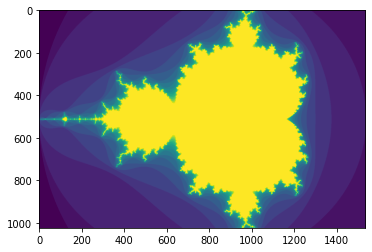

In [55]:
from pylab import imshow, show

image = np.zeros((1024, 1536), dtype = np.uint8)
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
imshow(image); show()

In [57]:
from numba import jit

@jit(nopython=True) # Efek sama dengan njit, namun punya customizable parameters
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
    return max_iters

@jit(nopython=True) # Efek sama dengan njit, namun punya customizable parameters
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

In [58]:
%%timeit 
image = np.zeros((1024, 1536), dtype = np.uint8)
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
# Dengan JIT

83.6 ms ± 381 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


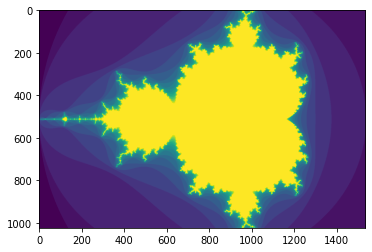

In [59]:
image = np.zeros((1024, 1536), dtype = np.uint8)
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 
imshow(image); show()

# Numba Tidak Dapat Digunakan Pada Dictionary

In [60]:
N = 100
D = {i:i**2 for i in range(N)}

def fs(D):
    return sum(D.values())/len(D)

In [61]:
fs(D)

3283.5

In [62]:
@jit(nopython=True)
def fs(D):
    return sum(D.values())/len(D)

In [64]:
try:
    fs(D)
except Exception as err_:
    print('Error : ', err_) 

Error :  Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'sum': cannot determine Numba type of <class 'builtin_function_or_method'>

File "<ipython-input-62-4ad555e73772>", line 3:
def fs(D):
    return sum(D.values())/len(D)
    ^


This error may have been caused by the following argument(s):
- argument 0: cannot determine Numba type of <class 'dict'>

This error may have been caused by the following argument(s):
- argument 0: cannot determine Numba type of <class 'dict'>



## Error bisa dihindari dengan menghilangkan parameter "nopython=True", tapi tidak akan ada gained performance dari fungsi numbanya.

# Parallel Programming lewat Numba

In [155]:
N = 5*10**6
a = np.random.rand(N).reshape(N)

def fs(a):
    trace = 0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i])
    return a + trace

In [156]:
%timeit fs(a)

11.9 s ± 208 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [157]:
from numba import prange

@jit(nopython=True, parallel=True)
def fs(a):
    trace = 0
    for i in prange(a.shape[0]):
        trace += np.tanh(a[i])
    return a + trace

In [158]:
%timeit fs(a)

34.6 ms ± 4.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [159]:
@jit(nopython=True, parallel=True, fastmath=True)
def fs(a):
    trace = 0
    for i in prange(a.shape[0]):
        trace += np.tanh(a[i])
    return a + trace

In [160]:
%timeit fs(a)

31.6 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# End of Module

<hr>
<img alt="" src="images/looping_funny.png"/>